In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('student_performance_dataset(in).csv')
print(df)

    Student_ID  Age Gender  Math_Score  English_Score  Science_Score  \
0            1   17      M          81             69             96   
1            2   18      F          88             85             82   
2            3   15      F          98             68             54   
3            4   17      F          81             75             97   
4            5   17      F          53             52             68   
..         ...  ...    ...         ...            ...            ...   
95          96   16      F          58             83             93   
96          97   16      F          55             70             54   
97          98   18      F          65             79             88   
98          99   16      M          78             82             53   
99         100   15      M          52             77             55   

    Study_Hours  Attendance (%)  
0           2.0            64.1  
1          11.1            96.1  
2          11.3            80.2  

In [5]:
maths_scores = np.array(df['Math_Score'])
english_scores = np.array(df['English_Score'])
science_scores = np.array(df['Science_Score'])
study_hours = np.array(df['Study_Hours'])
attendance = np.array(df['Attendance (%)'])

In [6]:
# Converting 'M' to 0 and 'F' to 1
genders = np.array([0 if gender == 'M' else 1 for gender in df['Gender']])

In [ ]:
display(df)

,Student_ID,Age,Gender,Math_Score,English_Score,Science_Score,Study_Hours,Attendance (%)
0,1,17,M,81,69,96,2.0,64.1
1,2,18,F,88,85,82,11.1,96.1
2,3,15,F,98,68,54,11.3,80.2
3,4,17,F,81,75,97,13.1,93.1
4,5,17,F,53,52,68,14.8,72.8
...,...,...,...,...,...,...,...,...
95,96,16,F,58,83,93,18.7,74.1
96,97,16,F,55,70,54,17.3,83.3
97,98,18,F,65,79,88,9.2,63.1
98,99,16,M,78,82,53,15.3,99.0


In [7]:
maths_mean = np.mean(maths_scores)
english_mean = np.mean(english_scores)
science_mean = np.mean(science_scores)

maths_std = np.std(maths_scores)
english_std = np.std(english_scores)
science_std = np.std(science_scores)

In [8]:
study_science_corr = np.corrcoef(study_hours, science_scores)[0, 1]


In [9]:
attendance_maths_corr = np.corrcoef(attendance, maths_scores)[0, 1]
attendance_english_corr = np.corrcoef(attendance, english_scores)[0, 1]
attendance_science_corr = np.corrcoef(attendance, science_scores)[0, 1]

print(f"Mean Maths Score: {maths_mean}, Std: {maths_std}")
print(f"Correlation between Study Hours and Science Score: {study_science_corr}")
print(f"Correlation between Attendance and Math Score: {attendance_maths_corr}")

Mean Maths Score: 74.86, Std: 15.072504768617591
Correlation between Study Hours and Science Score: -0.16188220309103518
Correlation between Attendance and Math Score: 0.03500877988507113


In [10]:
low_scores = np.where((maths_scores < 60) | (english_scores < 60) | (science_scores < 60))
high_scores = np.where((maths_scores > 90) | (english_scores > 90) | (science_scores > 90))

print(f"Students with low scores: {low_scores}")
print(f"Students with high scores: {high_scores}")

Students with low scores: (array([ 2,  4,  5,  8, 14, 15, 16, 20, 23, 25, 29, 30, 31, 34, 35, 37, 39,
       41, 42, 43, 44, 46, 50, 51, 60, 61, 63, 64, 67, 68, 70, 74, 76, 77,
       78, 80, 82, 87, 88, 89, 92, 93, 95, 96, 98, 99], dtype=int64),)
Students with high scores: (array([ 0,  2,  3,  7,  9, 11, 13, 17, 19, 20, 21, 22, 23, 26, 27, 28, 29,
       32, 36, 38, 40, 41, 45, 47, 48, 49, 52, 53, 56, 57, 59, 62, 64, 65,
       66, 69, 73, 74, 77, 81, 82, 83, 86, 87, 90, 91, 92, 94, 95],
      dtype=int64),)


In [11]:
slope, intercept = np.polyfit(study_hours, maths_scores, 1)
print(f"Regression line: Maths_Score = {slope} * Study_Hours + {intercept}")

Regression line: Maths_Score = -0.13295157798977184 * Study_Hours + 76.23405455852429


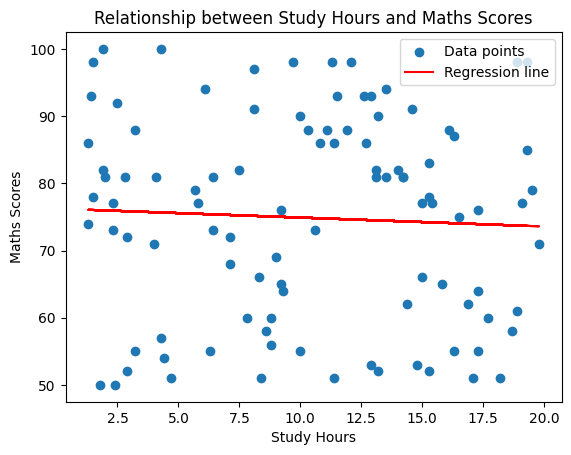

In [12]:
plt.scatter(study_hours, maths_scores, label='Data points')
plt.plot(study_hours, slope * study_hours + intercept, color='red', label='Regression line')
plt.xlabel('Study Hours')
plt.ylabel('Maths Scores')
plt.title('Relationship between Study Hours and Maths Scores')
plt.legend()
plt.show()